In [1]:
# sources: 
# https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb
# http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import sklearn
from sklearn.manifold import LocallyLinearEmbedding, Isomap, SpectralEmbedding, MDS

plt.rcParams["figure.figsize"] = (15,15)

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

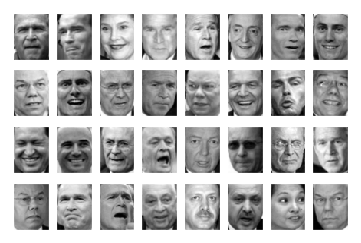

In [3]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')


In [4]:
lle_model = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard')
lle_reduced_data = lle_model.fit_transform(faces.data)
lle_reduced_data.shape

(2370, 2)

In [5]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

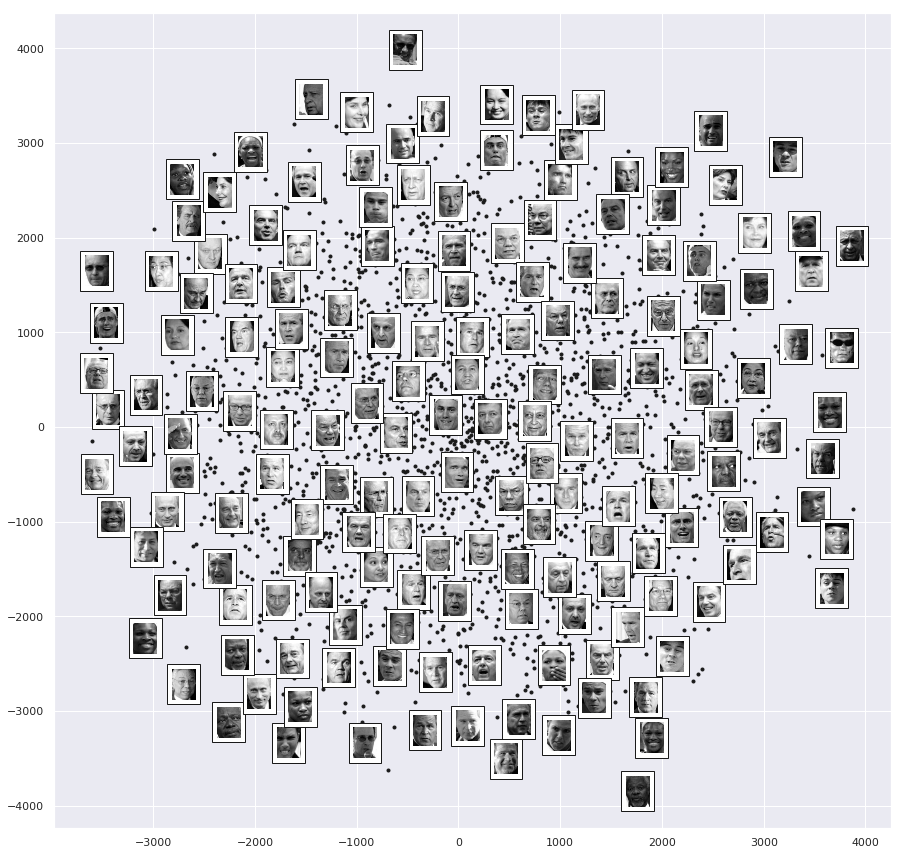

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(faces.data,
                model=MDS(n_components=2, metric=True, dissimilarity='euclidean',max_iter=30),
                images=faces.images[:, ::2, ::2])

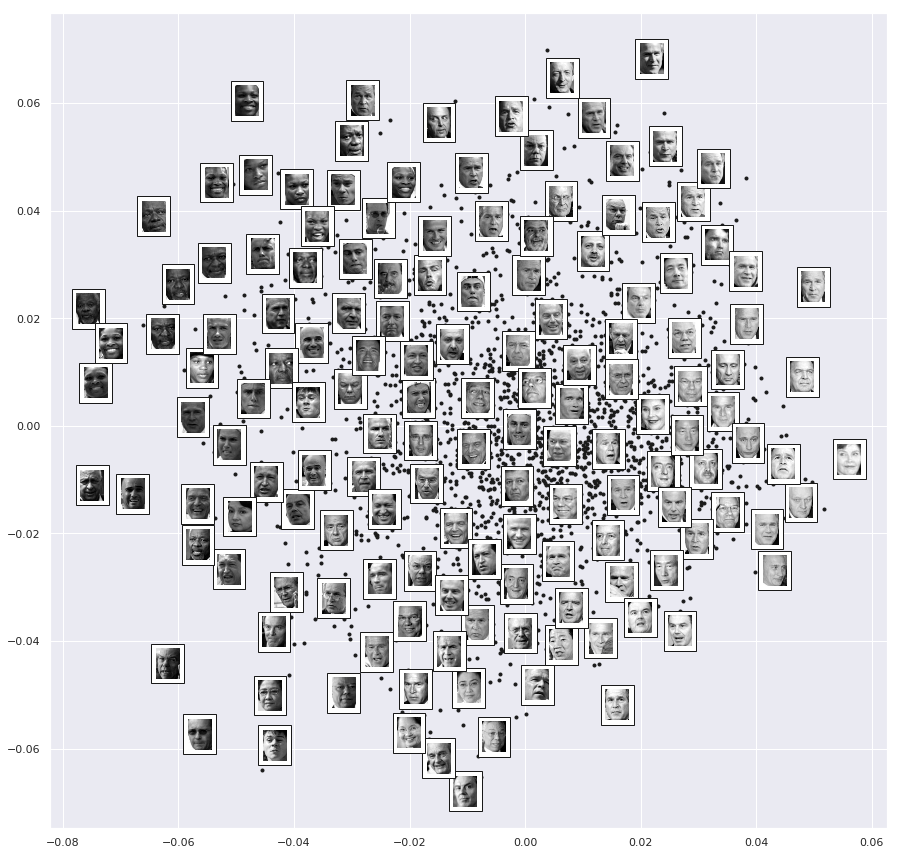

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(faces.data,
                model=LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='standard'),
                images=faces.images[:, ::2, ::2])

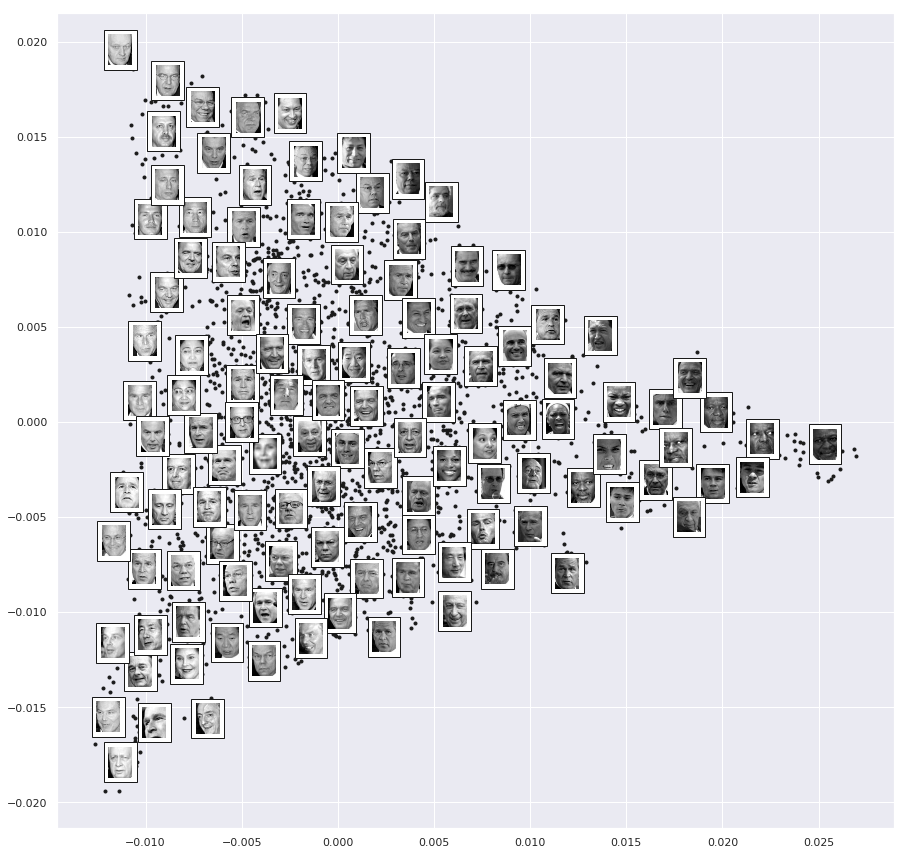

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(faces.data,
                model = SpectralEmbedding(n_neighbors=10, n_components=2, affinity='nearest_neighbors'),
                images=faces.images[:, ::2, ::2])

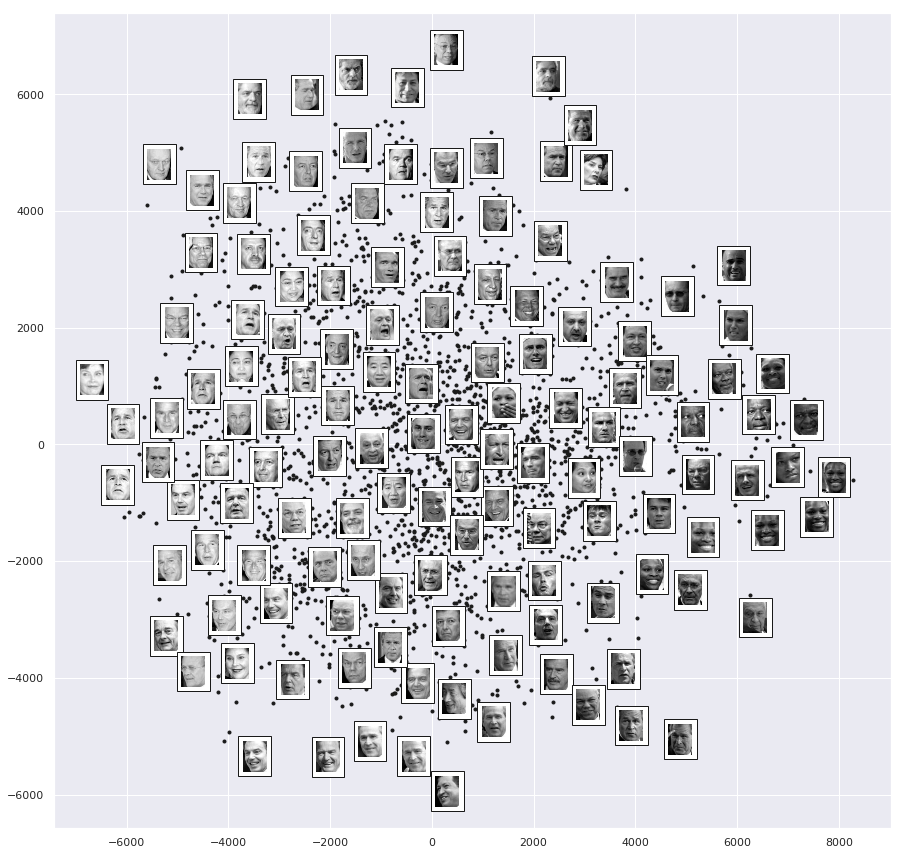

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])